# D209 - Predictive Analysis
---

In [1]:
## Print python version
from platform import python_version
print('Python Version:', python_version())

Python Version: 3.9.12


In [2]:
## Import libraries/packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,10)
plt.rcParams['figure.max_open_warning'] = False
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.exceptions import DataConversionWarning
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import warnings
warnings.filterwarnings('ignore')

# Import Data
---

In [3]:
## Import data
df = pd.read_csv('churn_clean.csv').reset_index(drop=True)

# Data Preparation
---

## Check for missing values

In [4]:
## Review shape and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

## Drop and rename variables

In [5]:
## Drop granular data
df.drop([
    'CaseOrder', 
    'Customer_id', 
    'Interaction', 
    'UID', 
    'City', 
    'State',
    'County', 
    'Zip', 
    'Lat', 
    'Lng', 
    'TimeZone', 
    'Job'
], axis=1, inplace=True)

In [6]:
## Rename non-descript variables
df.rename({
    'Item1':'TimelyResponse',
    'Item2':'TimelyFixes',
    'Item3':'TimelyReplacements',
    'Item4':'Reliability',
    'Item5':'Options',
    'Item6':'RespectfulResponse',
    'Item7':'CourteousExchange',
    'Item8':'ActiveListening'
}, axis=1, inplace=True)

In [7]:
## Create a copy of the original data
df1 = df.copy()

## Check for duplicate observations and outliers
---

In [8]:
## Check for duplicate values
print('Duplicate Values Found:', df.duplicated().sum())

Duplicate Values Found: 0


In [9]:
## Isolate string variables from numeric variables
object_df = pd.DataFrame()
for col in df.columns:
    if df[col].dtype == object:
        object_df[col] = df[col]
        df = df.drop(col, axis=1)

In [10]:
## Scale the data
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X, y = df.drop('Bandwidth_GB_Year', axis=1), df[['Bandwidth_GB_Year']]
X = pd.DataFrame(X_scaler.fit_transform(X), columns=X.columns)
y = pd.DataFrame(y_scaler.fit_transform(y), columns=y.columns)
X['Bandwidth_GB_Year'] = y['Bandwidth_GB_Year']
df = X
X.drop('Bandwidth_GB_Year', axis=1, inplace=True)

In [11]:
## Detect outliers
df[df.abs() > 3].dropna(how='all')

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,TimelyResponse,TimelyFixes,TimelyReplacements,Reliability,Options,RespectfulResponse,CourteousExchange,ActiveListening
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.091701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.414525,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.091701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,3.219376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,3.273556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9923,NaN,NaN,NaN,NaN,NaN,NaN,3.041027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.091701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9972,NaN,NaN,NaN,NaN,NaN,NaN,3.041027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9987,5.387511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
## Remove observations with absolute zscore over 3
df = df[df.abs() < 3].dropna()

In [13]:
## Evaluate data loss
lost = ((len(object_df) - len(df)) / len(object_df)) * 100
print('Data Lost: {}%\nData Kept: {}%'.format(lost, 100-lost))

Data Lost: 9.15%
Data Kept: 90.85%


In [14]:
## Drop same outlier observations from object data frame
object_df = object_df.loc[df.index]

## Encode categorical variables

In [15]:
## Define dictionary for contract variable
contract = {
    'Month-to-month': 0,
    'One year': 1,
    'Two Year': 2
}

## Encode the contract variable and drop it from object df
df['Contract'] = object_df['Contract'].map(contract)
object_df.drop('Contract', axis=1, inplace=True)

In [16]:
## Instantiate the label encoder
le = LabelEncoder()
## Loop through each variable to encode it
for col in object_df.columns:
    if 'Yes' in object_df[col].values:
        df[col] = le.fit_transform(object_df[col])
        object_df.drop(col, axis=1, inplace=True)

In [17]:
## Get dummy variables
object_df = pd.get_dummies(object_df)

In [18]:
## Combine data frames
df[object_df.columns] = object_df
df['Bandwidth_GB_Year'] = y.loc[df.index]

# Store Clean Data
---

In [19]:
## Save clean data set to csv file
df.to_csv('rf_clean.csv')

## Split train and test data

In [20]:
## Split the data into training and testing sets
X, y = df.drop('Bandwidth_GB_Year', axis=1), df[['Bandwidth_GB_Year']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [21]:
## Combine target and explanatory variables
X_train['Bandwidth_GB_Year'] = y_train
X_test['Bandwidth_GB_Year'] = y_test

## Store train and test data sets

In [22]:
## Save training and testing data sets to csv files
X_train.to_csv('rf_train.csv')
X_test.to_csv('rf_test.csv')

In [23]:
## Drop target variable from train and test sets
X_train.drop('Bandwidth_GB_Year', axis=1, inplace=True)
X_test.drop('Bandwidth_GB_Year', axis=1, inplace=True)

# Data Modeling
---

## Train and test the model

In [24]:
## Instantiate random forest model
rf = RandomForestRegressor(random_state=10)

In [25]:
## Fit the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [26]:
## Use the fitted model to make predictions
y_pred = pd.DataFrame(rf.predict(X_test), index=y_test.index, columns=y_test.columns)

In [27]:
## Score the quality of predictions
r2 = rf.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print(f'R-Squared: {round(r2, 6)}\nMean Squared Error: {round(mse, 6)}')

R-Squared: 0.997991
Mean Squared Error: 0.002026


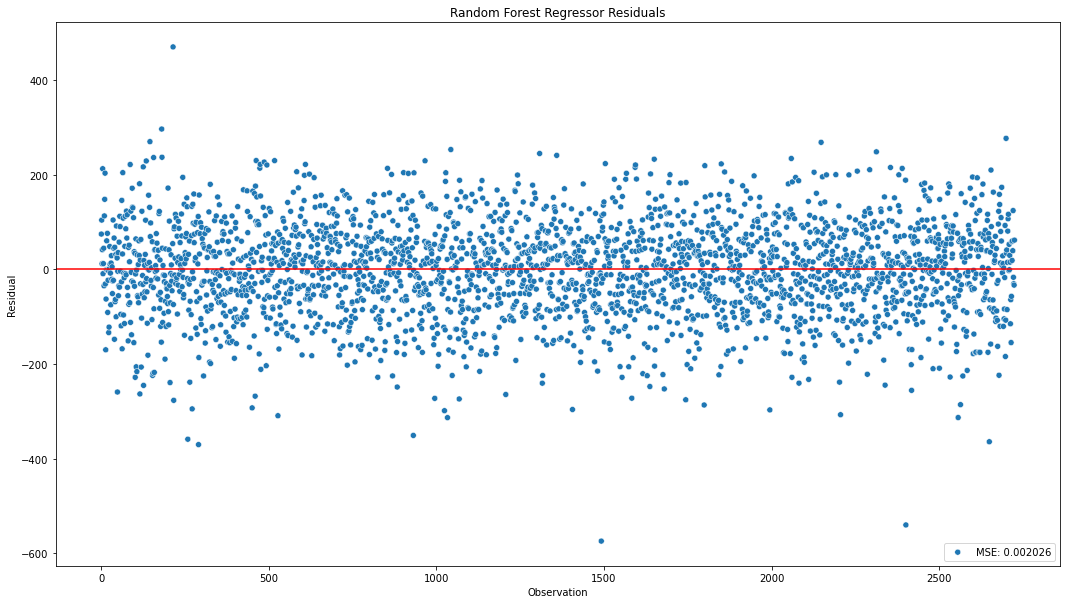

In [28]:
## Plot residuals
resid = y_scaler.inverse_transform(y_pred) - y_scaler.inverse_transform(y_test)
sns.scatterplot(data=resid)
plt.axhline(mse, c='red')
plt.title('Random Forest Regressor Residuals')
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.legend([f'MSE: {round(mse, 6)}'], loc='lower right')
plt.show()

In [29]:
## Store true and predicted values in a data frame
res = pd.DataFrame(y_test.values, index=y_test.index, columns=['True'])
res['Predicted'] = y_pred
## Calculate the correlation coefficient
corr_coef = round(res.corr()['True']['Predicted'], 6)

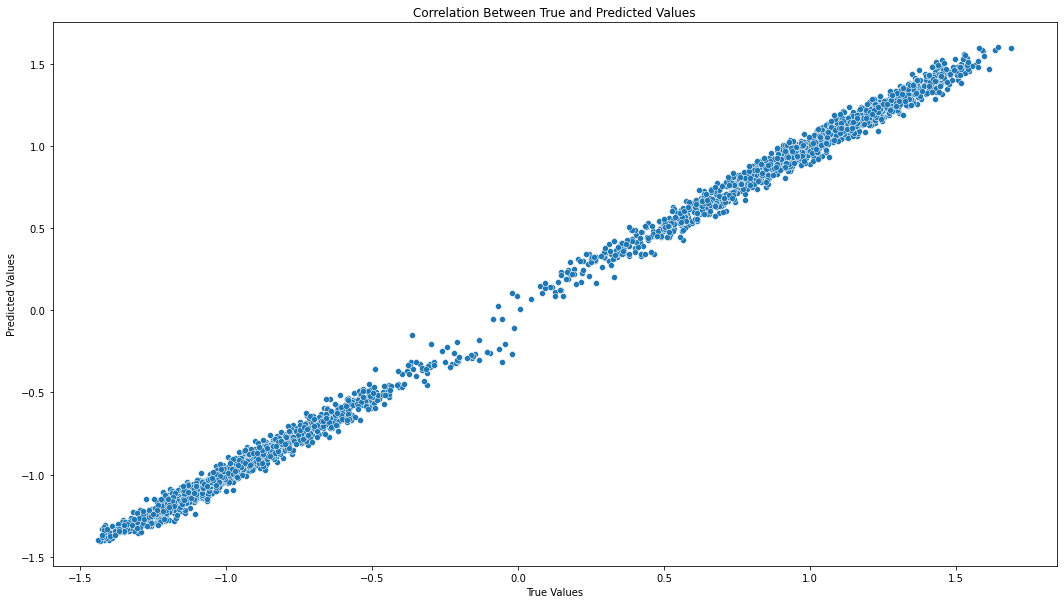

In [30]:
## Plot the true and predicted values to view correlation
sns.scatterplot(res['True'], res['Predicted'])
plt.title('Correlation Between True and Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

## Feature Selection

In [31]:
## Store feature importance in a data frame
importance = pd.DataFrame(
    rf.feature_importances_, 
    index=rf.feature_names_in_, 
    columns=['gini']
).sort_values('gini', ascending=False)

In [32]:
## Review the top ten most important features
importance.head(20)

,gini
Tenure,0.984203
InternetService_DSL,0.007915
MonthlyCharge,0.005031
Age,0.000803
Children,0.000399
StreamingTV,0.000172
Income,0.000131
Outage_sec_perweek,0.000124
Population,0.000124
Email,0.000075


In [33]:
## Test models using each feature
scores = pd.DataFrame(columns=['r2', 'mse', 'features'])
mod = RandomForestRegressor(random_state=10)
for i in range(1, len(importance)):
    features = importance.index[:i]
    mod.fit(X_train[features], y_train)
    pred = mod.predict(X_test[features])
    scores.loc[i-1] = r2_score(y_test, pred), mean_squared_error(y_test, pred), features.values

In [34]:
## Print results
scores = scores.sort_values('mse').reset_index(drop=True)
print(f'Initial Model R-Squared: {round(r2, 6)}\nBest Model R-Squared: {round(scores.r2[0], 6)}\n')
print(f'Initial Model MSE: {round(mse, 6)}\nBest Model MSE: {round(scores.mse[0], 6)}\n\nFeatures:')
for feature in scores['features'][0]:
    print(feature)
print(f'\nTotal Features: {len(scores.features[0])}')

Initial Model R-Squared: 0.997991
Best Model R-Squared: 0.99825

Initial Model MSE: 0.002026
Best Model MSE: 0.001765

Features:
Tenure
InternetService_DSL
MonthlyCharge
Age
Children
StreamingTV

Total Features: 6


In [35]:
## Define reduced features
features = scores.features[0]

## Check for Multicollinearity

In [36]:
## Calculate the variance inflation factor
for i in range(len(features)):
    print(f'{features[i]}: {round(vif(X[features], i), 3)}')

Tenure: 1.0
InternetService_DSL: 1.291
MonthlyCharge: 1.209
Age: 1.001
Children: 1.004
StreamingTV: 1.46


## Predict Future Usage

In [37]:
## Define X and y of active customers
X = X[X['Churn'] == 0]
y = y.loc[X.index]

In [38]:
## Increase tenure by 12 months
future_X = X
future_X['Tenure'] = X['Tenure'] + 12

In [39]:
## Instantiate random forest model
rf = RandomForestRegressor(random_state=10)

In [40]:
## Fit the random forest model
rf.fit(X[features], y)

RandomForestRegressor(random_state=10)

In [41]:
## Predict using the fitted model
y_pred = pd.DataFrame(index=y.index)
y_pred['Current Bandwidth'] = y_scaler.inverse_transform(y)
y_pred['Bandwidth +12 Months'] = y_scaler.inverse_transform(rf.predict(future_X[features]).reshape(-1,1))

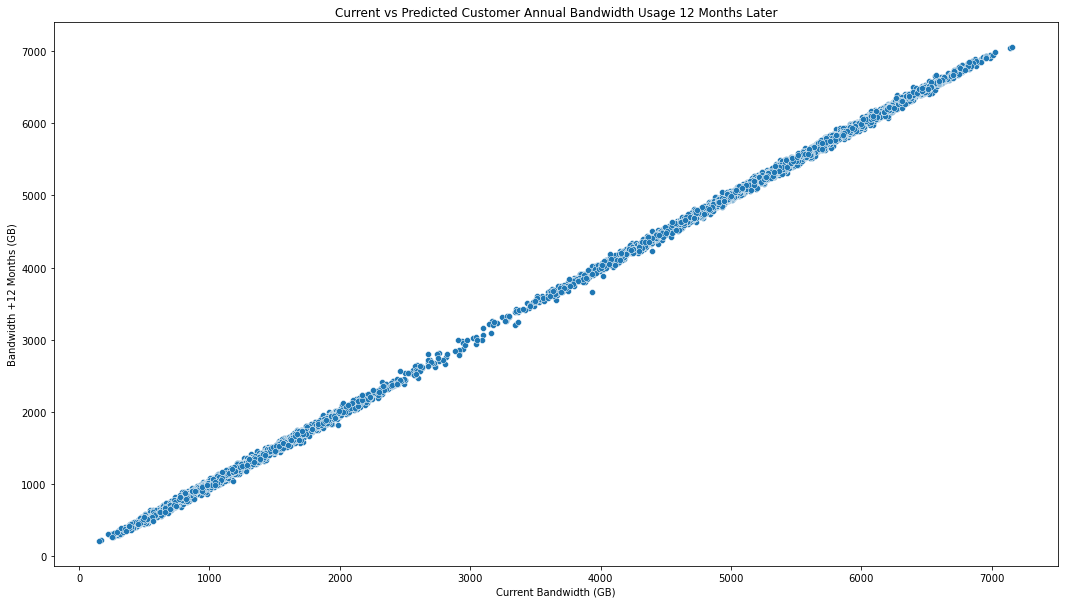

In [42]:
## Plot the current and predicted values to view correlation
sns.scatterplot(y_pred['Current Bandwidth'], y_pred['Bandwidth +12 Months'])
plt.title('Current vs Predicted Customer Annual Bandwidth Usage 12 Months Later')
plt.xlabel('Current Bandwidth (GB)')
plt.ylabel('Bandwidth +12 Months (GB)')
plt.show()

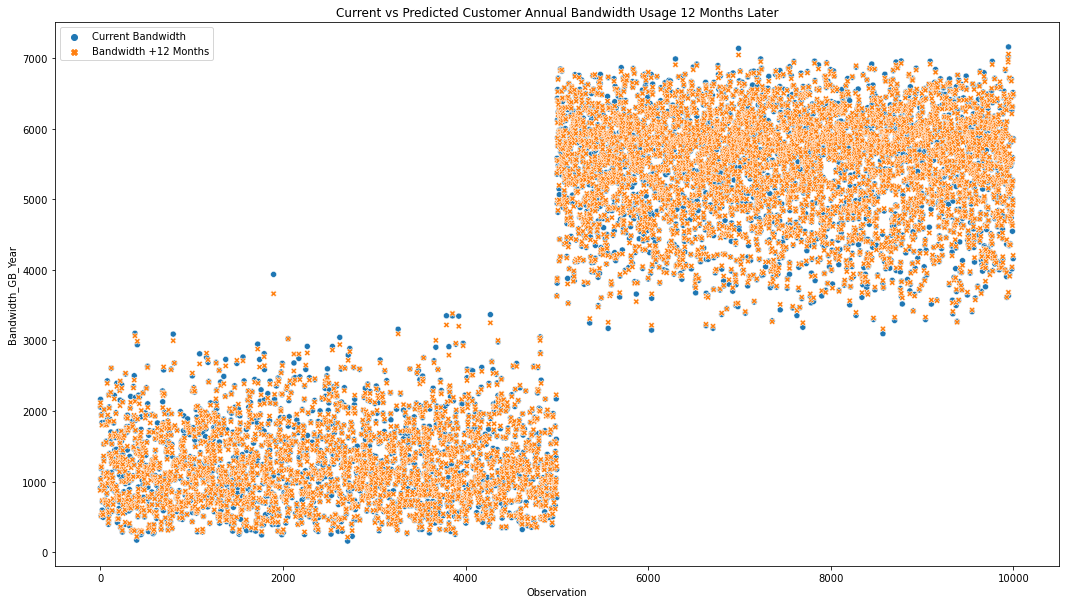

In [43]:
## Plot prediction results
sns.scatterplot(data=y_pred)
plt.title('Current vs Predicted Customer Annual Bandwidth Usage 12 Months Later')
plt.xlabel('Observation')
plt.ylabel('Bandwidth_GB_Year')
plt.legend()
plt.show()

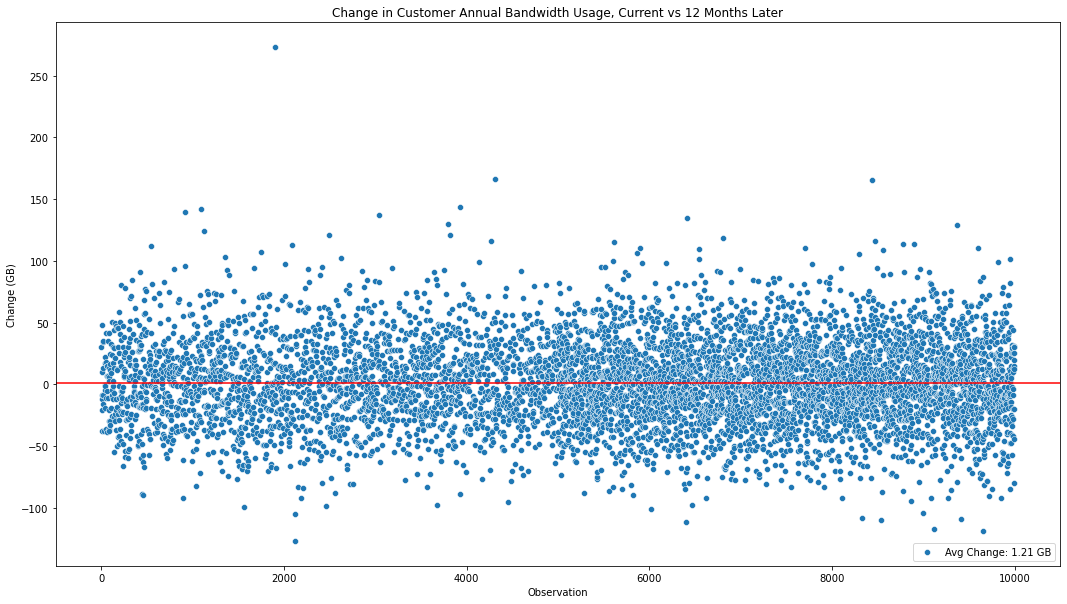

In [44]:
## Plot difference in bandwidth usage
resid = y_pred['Current Bandwidth'] - y_pred['Bandwidth +12 Months']
sns.scatterplot(data=resid)
plt.axhline(resid.mean(), c='red')
plt.title('Change in Customer Annual Bandwidth Usage, Current vs 12 Months Later')
plt.xlabel('Observation')
plt.ylabel('Change (GB)')
plt.legend([f'Avg Change: {round(resid.mean(), 2)} GB'], loc='lower right')
plt.show()

## View Feature and Target Correlation

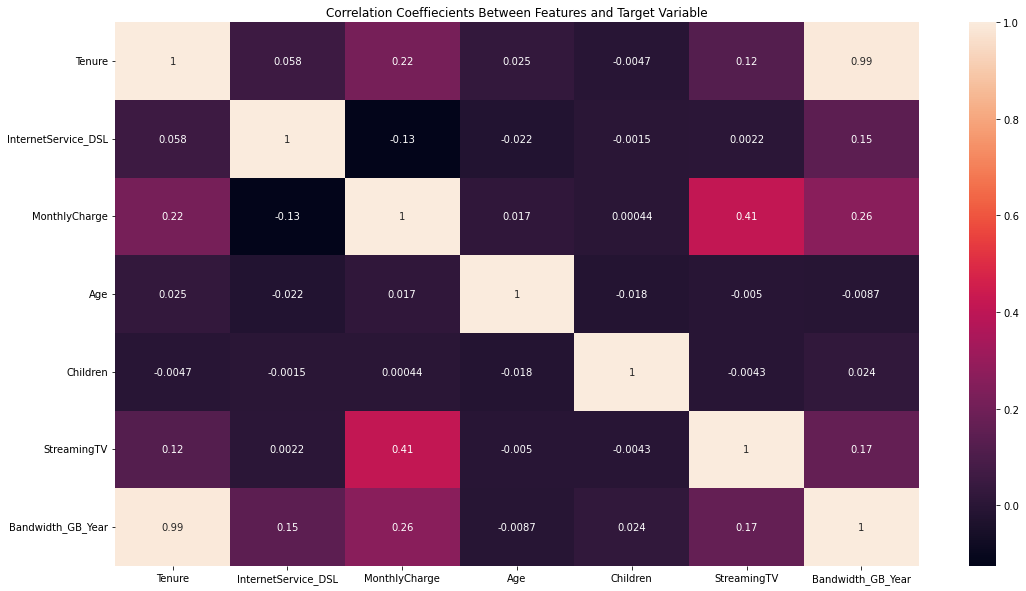

In [45]:
df2 = X[features]
df2['Bandwidth_GB_Year'] = y
sns.heatmap(df2.corr(), annot=True)
plt.title('Correlation Coeffiecients Between Features and Target Variable')
plt.show()